In [45]:
from IPython.display import Math
from IPython.display import Latex
from IPython.display import display


21 задача заключается в построении орбиты небесного тела, а также вычисления переменной E при прочих равных при помощи 3-х способов.

Использованные библиотеки:


In [2]:
import numpy as np
import scipy as sp
import mpmath as mp
import time as ti
from scipy import optimize
import matplotlib.pyplot as plt
from IPython.display import display, Math

Орбита небесного тела представляет собой эллипс, в одной из вершин которого находится Солнце или другой центр системы.

Эксцентриситет известен (равен 0.1), значит, орбиту уже можно изобразить, a (большую полуось) можно взять произвольной.

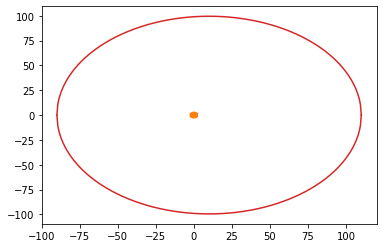

In [18]:
si = 350  
a = 100    
e = 0.1     
b = np.sqrt(a**2 - (a*e)**2)    
c = np.sqrt(a**2 - b**2)    
x = np.linspace(-a + c, a + c, si)    
y = np.sqrt((b**2)*(1-((x-c)**2)/(a**2)))   
plt.plot(x, y, color='tab:red')   
plt.plot(x, -1*y, color='tab:red') 
xs = np.linspace(-1, 1, a)    
ys = np.sqrt(1-xs**2)   
plt.plot(xs, ys, color='tab:orange',linewidth = 5)    
plt.plot(xs, -1*ys, color='tab:orange',linewidth = 5)

In [19]:
print("Оранжевая точка - светило, или другой центр системы\nРисунок не идеальный, т. к. немного сплющен, но по координатам верный")

Оранжевая точка - светило, или другой центр системы
Рисунок не идеальный, т. к. немного сплющен, но по координатам верный


In [20]:
print("Теперь приступим к вычислению Е. Сначала используем стандартную ф-ю, реализующую алгоритм Брента")

Теперь приступим к вычислению Е. Сначала используем стандартную ф-ю, реализующую алгоритм Брента


In [23]:
M = 24.851090
def fE(x):
    return x - e*np.sin(x) - M
begin = ti.time()*1000
Eb = sp.optimize.brentq(fE,-1,100)
end = ti.time()*1000
print("Результат: " + str(Eb) + "\nВремя: " + str(end-begin))

Результат: 24.820357182542907
Время:0.0


Теперь вычислим по формуле из задачи 

$\displaystyle E = \sum_{m=1}^{\infty} \frac{J_m (m\varepsilon) \sin(mM)}{m}$

Где Jm(x) - функция Бесселя 1-го рода порядка m.

In [47]:
m = np.arange(1, a + 1, dtype=float)
E = []
begin = ti.time()*1000
for i in range(0,a):
    E.append((m[i]**-1)*mp.besselj(m[i], m[i]*e)*np.sin(m[i]*M))
Es = M + 2*sum(E)
end = ti.time()*1000
print("Результат: " + str(Es) + "\nВремя: " + str(end-begin))

Результат: 24.8203571825429
Время: 12.73046875


Теперь будем сами вычислять Jm по формуле 

$\displaystyle J_m(x) = \sum_{n=0}^{\infty} \frac{(-1)^n (x/2)^{2n+m}}{n!(m+n)!}$

Т. к. факториалы и степень очень большие, возникают ошибки при конвертировании их во float, поэтому приходится прибегать к таким мерам

In [38]:
def HelpFun(n,m,y):
    ans = 1.0
    for i in range(1,n+1):
        ans *= y / i**2
    for i in range(1,m+1):
        ans *= y/(i+n)
    for i in range(1,n+1):
        ans *= y
    return ans

def J2(j,x):
    j = int(j)
    ansar = []
    for i in range(0,a):
         ansar.append(((-1)**i)*HelpFun(i,j,x/2))
    return sum(ansar)

E = []
begin = ti.time()*1000
for i in range(0,a):
    E.append((m[i]**-1)*J2(m[i], m[i]*e)*np.sin(m[i]*M))
Ej = M + 2*sum(E)
end = ti.time()*1000
print("Результат: " + str(Ej) + "\nВремя: " + str(end-begin))

Результат: 24.820357182542907
Время: 699.341552734375


Как мы видим, все методы выдают совпадающий результат, за исключением того, что второе значение менее точно на 2 порядка, ~на 13% менее точно. Однако, третий метод показал себя как самый долгий, второй сильно превосходит его, а время работы первого записать не удалось, что может быть следствием его высокой эффективности.